In [69]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


In [71]:
# Load dataset without custom date parser
series = pd.read_csv('/users/Delvefohoue/downloads/Faso/FasoGDP.csv', 
                     header=0, 
                     index_col=0, 
                     parse_dates=True)

/var/folders/1w/ds0rb4m96vb3k16ysgg19q1w0000gn/T/ipykernel_14466/4179443073.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.read_csv('/users/Delvefohoue/downloads/Faso/FasoGDP.csv',


In [73]:
# Convert index to period
series.index = pd.to_datetime(series.index, format='%Y/%m')
series.index = series.index.to_period('M')

In [75]:
# Split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[:size], X[size:]
history = [x for x in train]
predictions = list()

In [77]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [79]:
# Check stationarity with ADF test
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.5447290621510574
p-value: 0.9861710297264659


In [81]:
# If p-value > 0.05, the series is non-stationary and differencing is needed.

series_diff = series.diff().dropna()
# Perform ADF test on differenced series
result_diff = adfuller(series_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -2.87852744921232
p-value (Differenced): 0.04790254740157394


In [83]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

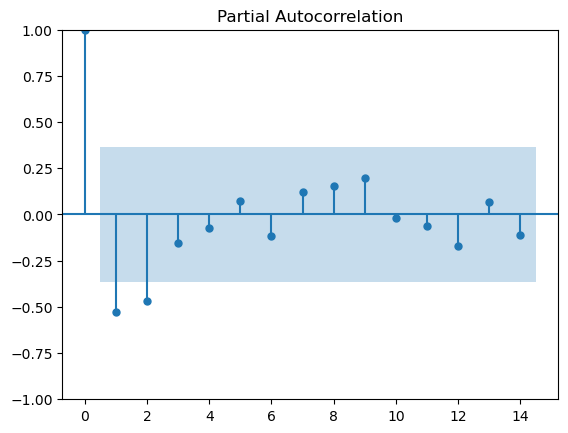

In [85]:
# Plot PACF
plot_pacf(series_diff)
plt.show()

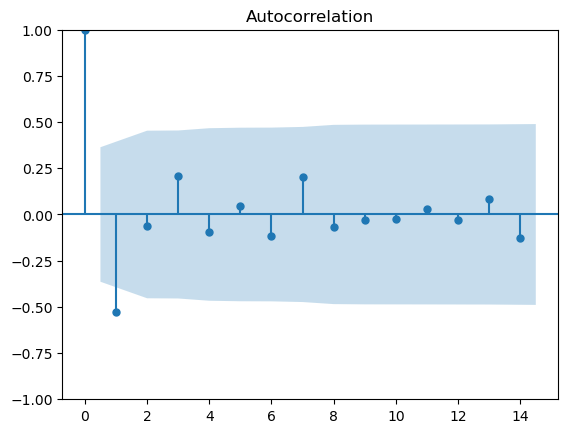

In [87]:
# Plot ACF
plot_acf(series_diff)
plt.show()

In [89]:
# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(8,1,10))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/1w/ds0rb4m96vb3k16ysgg19q1w0000gn/T/ipykernel_14466/3588553211.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=7.328179, expected=5.792585


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4.043985, expected=4.326846


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7.515014, expected=3.921229


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.148586, expected=5.957977


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.989011, expected=6.203489


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6.473500, expected=6.604569


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4.716892, expected=5.889205


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4.705978, expected=2.010773


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5.172979, expected=6.939155


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.667927, expected=1.777915
predicted=6.625915, expected=2.960180


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.019


In [91]:
# Limit to 5 years of prediction
years_to_plot = 28
periods_per_year = 28
num_points = years_to_plot * periods_per_year

In [92]:
# Select the range for plotting
test_range = test[:num_points]
predictions_range = predictions[:num_points]
dates_range = series.index[-len(test):][:num_points].to_timestamp()

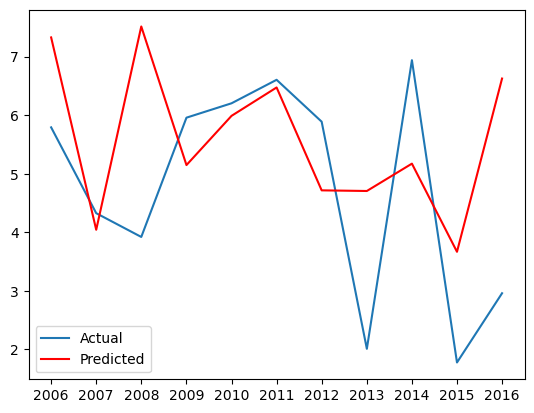

In [97]:

# Plot forecasts against actual outcomes
plt.plot(dates_range, test_range, label='Actual')
plt.plot(dates_range, predictions_range, color='red', label='Predicted')
plt.legend()
plt.show()

In [16]:
# Future prediction (5 years ahead)
model = ARIMA(history, order=(8,1,10))
model_fit = model.fit()
future_steps = 2 * 12  # 5 years of monthly predictions
future_forecast = model_fit.forecast(steps=future_steps)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
# Generate future dates
last_date = series.index[-1].to_timestamp()
future_dates = pd.date_range(last_date, periods=future_steps, freq='MS')

In [18]:

# Combine future predictions with actual data
future_series = pd.Series(future_forecast, index=future_dates)
all_data = pd.concat([series, future_series])

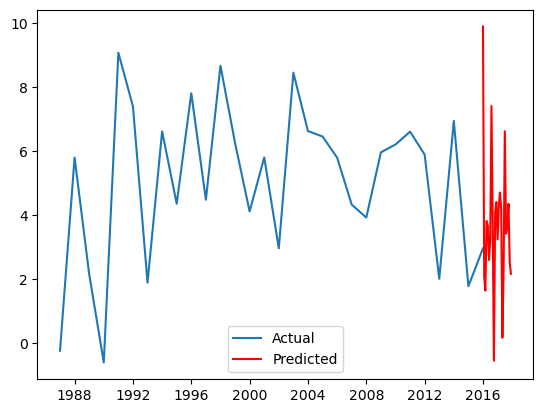

In [19]:
# Plot actual data and future predictions
plt.plot(series.index.to_timestamp(), series, label='Actual')
plt.plot(future_series.index, future_series, color='red', label='Predicted')
plt.legend()
plt.show()